In [1]:
import jax.numpy as jnp
import jax3dp3 as j
import trimesh
import os
import numpy as np
import trimesh
import jax
import matplotlib.pyplot as plt
import time
import open3d as o3d


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [18]:
intrinsics = j.Intrinsics(
    height=100,
    width=100,
    fx=200.0, fy=200.0,
    cx=50.0, cy=50.0,
    near=0.001, far=0.5
)

model_dir = os.path.join(j.utils.get_assets_dir(), "bop/ycbv/models")

renderer = j.Renderer(intrinsics)
model_names = j.ycb_loader.MODEL_NAMES
for IDX in range(len(model_names)):
    mesh_path_ply = os.path.join(model_dir,"obj_" + "{}".format(IDX+1).rjust(6, '0') + ".ply")
    mesh = j.mesh.load_mesh(mesh_path_ply)
    renderer.add_mesh(mesh, scaling_factor=1.0/1000.0)

[E rasterize_gl.cpp:121] OpenGL version reported as 4.6


Increasing frame buffer size to (width, height, depth) = (128, 128, 512)


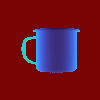

In [26]:
j.get_depth_image(renderer.render_single_object(
    j.t3d.inverse_pose(
        j.t3d.transform_from_pos_target_up(
            jnp.array([0.0, 0.4, 0.0]),
            jnp.array([0.0, 0.0, 0.0]),
            jnp.array([0.0, 0.0, 1.0]),
        )
    )
, 13)[:,:,2])

In [33]:
ROWS = 10
COLS = 5
keys = jax.random.split(jax.random.PRNGKey(5), ROWS * COLS)
object_poses = jax.vmap(lambda key: j.distributions.gaussian_vmf_sample(
    key, j.t3d.transform_from_pos(jnp.array([0.0, 0.0, 0.4])), 0.00001, 0.0000001))(
    keys
)
rendered_images = renderer.render_parallel(object_poses, 13)

In [34]:
viz_images = [j.get_depth_image(i[:,:,2]) for i in rendered_images]

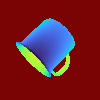

In [43]:
viz_images[21]

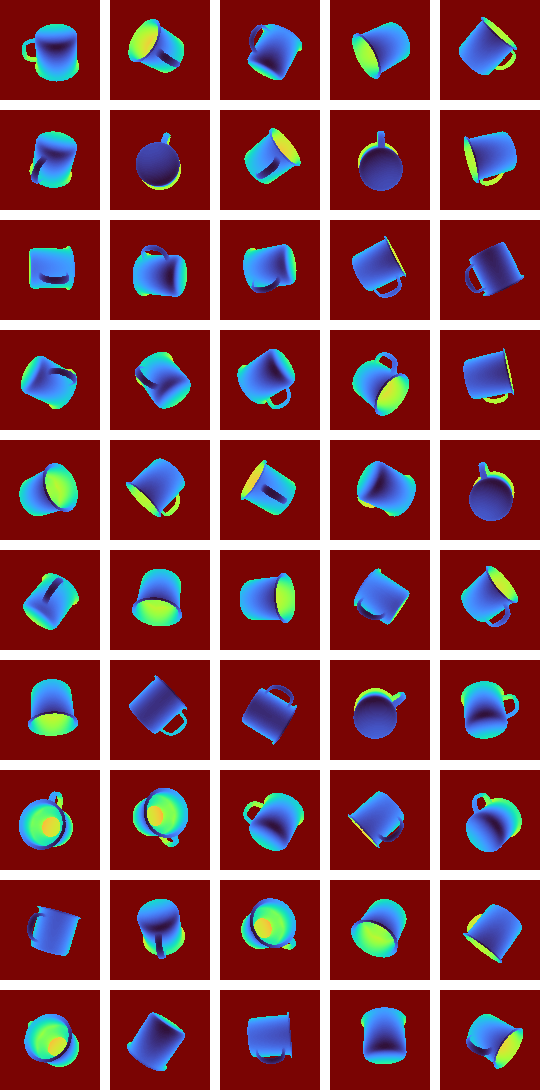

In [37]:
j.hvstack_images(
    viz_images, ROWS, COLS
)